In [3]:
# Import libraries 
import pandas as pd
import numpy as np

#import display for DataFrame usage
from IPython.display import display

# Load the credit card transactions dataset
data = pd.read_csv("creditcard.csv")
arr=np.array(data)
arr=arr[:,0:4]
arr=arr[1:5,:]
print(arr)

[[ 0.          1.19185711  0.26615071  0.16648011]
 [ 1.         -1.35835406 -1.34016307  1.77320934]
 [ 1.         -0.96627171 -0.18522601  1.79299334]
 [ 2.         -1.15823309  0.87773675  1.54871785]]


In [13]:
data_class_outcomes = data['Class']
#preserving only necessary columns 
data.drop(['Class'], axis = 1, inplace = True)

In [14]:
#import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [15]:
#Classifier = RFC
from sklearn.ensemble import RandomForestClassifier

def implement_rfc(X_train,y_train,X_test):
    """
    This function fits and transforms data using 
    Random Forest Classifier technique and 
    returns the y_pred value
    """
    clf_B = RandomForestClassifier(n_estimators=98)
    clf_B.fit(X_train, y_train)
    y_pred = clf_B.predict(X_test)
    return y_pred
    

In [16]:
y_pred = implement_rfc(X_train,y_train,X_test)

In [17]:
from sklearn.metrics import confusion_matrix
def calculate_confusion_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

In [19]:
result_confusion_matrix = calculate_confusion_matrix(y_test, y_pred)

In [20]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[71084     5]
 [   23    90]]


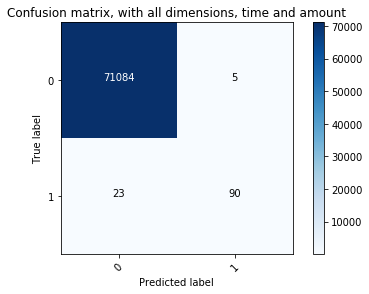

In [21]:
import numpy as np
import itertools
class_names = [0,1]
plot_confusion_matrix(result_confusion_matrix, classes=class_names,title='Confusion matrix, with all dimensions, time and amount')

In [22]:
import collections
def calculate_add_scores(confusion_matrix,Classifier="RFC"):
    TP = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TN = confusion_matrix[1][1]
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    precision = (TP/TP+FP)
    recall = (TP/TP+FN)
    values = [{'Classifier':Classifier,'Accuracy':accuracy,'Precision':precision,
              'Recall':recall}]
    dataframe = pd.DataFrame(values,columns=values[0].keys())
    return dataframe

In [23]:
df = calculate_add_scores(result_confusion_matrix)
print(df)


  Classifier  Accuracy  Precision  Recall
0        RFC  0.999607        6.0    24.0


In [24]:
data_time_outcomes = data['Time']
#preserving only necessary columns 
data.drop(['Time'], axis = 1, inplace = True)

In [25]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [27]:
y_pred = implement_rfc(X_train,y_train,X_test)

In [29]:
confusion_matrix_1 = calculate_confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[71084     5]
 [   24    89]]


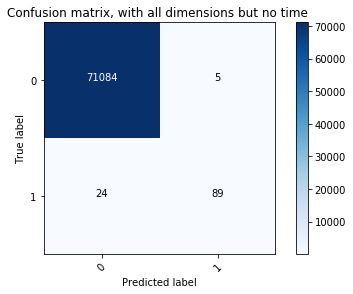

In [30]:
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_1, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time ')

In [32]:
new_df = calculate_add_scores(confusion_matrix_1)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999607        6.0    24.0
0        RFC  0.999593        6.0    25.0
0        RFC  0.999593        6.0    25.0


In [33]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [34]:
data_amount_outcomes = data['Amount']
data.drop(['Amount'], axis = 1, inplace = True)
display(data.describe())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


Training and testing split was successful.
Confusion matrix, without normalization
[[71083     6]
 [   28    85]]


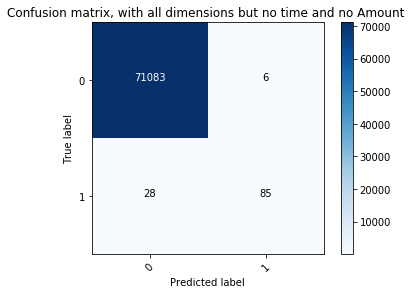

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")
y_pred = implement_rfc(X_train,y_train,X_test)
confusion_matrix_2 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_2, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time and no Amount ')

In [36]:
new_df = calculate_add_scores(confusion_matrix_2)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999607        6.0    24.0
0        RFC  0.999593        6.0    25.0
0        RFC  0.999593        6.0    25.0
0        RFC  0.999522        7.0    29.0


In [25]:
from sklearn.preprocessing import normalize
normalize_array = normalize(data_amount_outcomes.values.reshape(1,-1))

In [26]:
import numpy as np
new_data = np.concatenate((data, normalize_array.T), axis=1)

Training and testing split was successful.
Confusion matrix, without normalization
[[71084     5]
 [   24    89]]


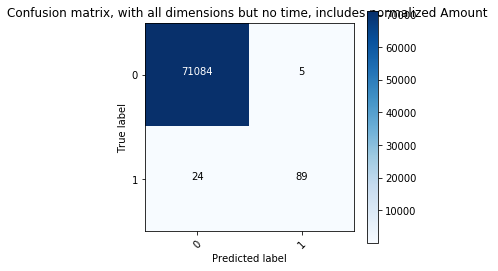

In [27]:
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.25, random_state=42)
print("Training and testing split was successful.")
clf = RandomForestClassifier(n_estimators=98)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_3 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_3, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time, includes normalized Amount ')

In [28]:
new_df = calculate_add_scores(confusion_matrix_3)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999593        6.0    25.0
0        RFC  0.999565        9.0    24.0
0        RFC  0.999579        7.0    25.0
0        RFC  0.999593        6.0    25.0


Training and testing split was successful.
Confusion matrix, without normalization
[[56862     2]
 [   22    76]]


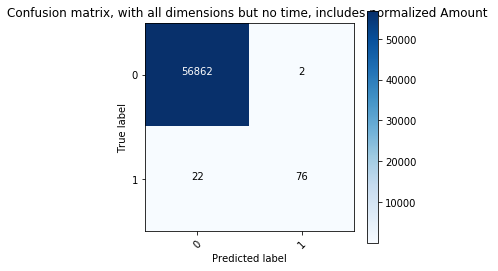

In [29]:
#try 2 with different parameters
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.2, random_state=42)
print("Training and testing split was successful.")
clf = RandomForestClassifier(n_estimators=98)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_4 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_4, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time, includes normalized Amount ')

In [30]:
new_df = calculate_add_scores(confusion_matrix_4)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

  Classifier  Accuracy  Precision  Recall
0        RFC  0.999593        6.0    25.0
0        RFC  0.999565        9.0    24.0
0        RFC  0.999579        7.0    25.0
0        RFC  0.999593        6.0    25.0
0        RFC  0.999579        3.0    23.0


Training and testing split was successful.
Confusion matrix, without normalization
[[56855     9]
 [   21    77]]


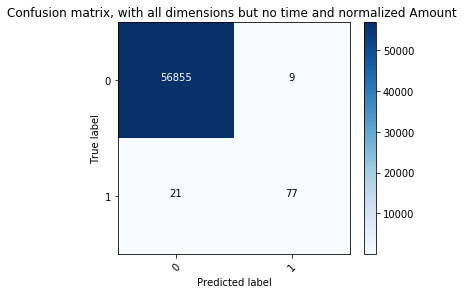

In [31]:
#Classifier = DTC, with max_depth=6
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.2, random_state=42)
print("Training and testing split was successful.")
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_4 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_4, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time and normalized Amount ')

In [32]:
new_df = calculate_add_scores(confusion_matrix_4,Classifier="DTC with max_depth=6")
frames = [df,new_df]
df = pd.concat(frames)
print(df)

             Classifier  Accuracy  Precision  Recall
0                   RFC  0.999593        6.0    25.0
0                   RFC  0.999565        9.0    24.0
0                   RFC  0.999579        7.0    25.0
0                   RFC  0.999593        6.0    25.0
0                   RFC  0.999579        3.0    23.0
0  DTC with max_depth=6  0.999473       10.0    22.0


Training and testing split was successful.
Confusion matrix, without normalization
[[56855     9]
 [   20    78]]


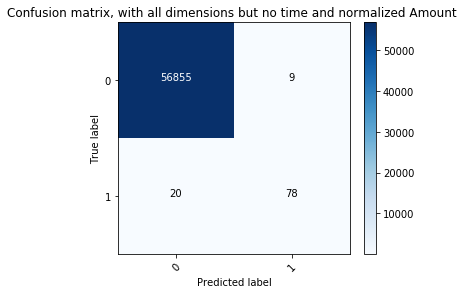

In [33]:
#Classifier = DTC, with max_depth=7
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(new_data,data_class_outcomes,test_size=0.2, random_state=42)
print("Training and testing split was successful.")
clf = tree.DecisionTreeClassifier(random_state=42,max_depth=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix_5 = calculate_confusion_matrix(y_test,y_pred)
class_names = [0,1]
plot_confusion_matrix(confusion_matrix_5, normalize=False, classes=class_names,
                      title='Confusion matrix, with all dimensions but no time and normalized Amount ')


In [34]:
new_df = calculate_add_scores(confusion_matrix_5,Classifier="DTC with max_depth=7")
frames = [df,new_df]
df = pd.concat(frames)
print(df)

             Classifier  Accuracy  Precision  Recall
0                   RFC  0.999593        6.0    25.0
0                   RFC  0.999565        9.0    24.0
0                   RFC  0.999579        7.0    25.0
0                   RFC  0.999593        6.0    25.0
0                   RFC  0.999579        3.0    23.0
0  DTC with max_depth=6  0.999473       10.0    22.0
0  DTC with max_depth=7  0.999491       10.0    21.0


In [35]:
# Above result explanation with dimesnions 
'''
RFC = Random Forest Classifier
DTC = Decision Tree Classifier

First result - RFC  including all dimensions in data set with test_size =0.25
Second result - RFC including all dimensions but time in data set with test_size =0.25
Third result - RFC including all dimensions but (time,amount) in data set with test_size =0.25
Fourth result - RFC including all dimensions but time, includes normalized amount with test_size =0.25
Fifth result - RFC including all dimensions but time, includes normalized amount with test_size =0.2
Sixth result - DTC with max_depth=6, including all dimensions but time, includes normalized 
               amount with test_size =0.2
Seventh result - DTC with max_depth=7, including all dimensions but time, includes normalized 
               amount with test_size =0.2

For optimal model of DTC max_depth is 6
'''

'\nRFC = Random Forest Classifier\nDTC = Decision Tree Classifier\n\nFirst result - RFC  including all dimensions in data set with test_size =0.25\nSecond result - RFC including all dimensions but time in data set with test_size =0.25\nThird result - RFC including all dimensions but (time,amount) in data set with test_size =0.25\nFourth result - RFC including all dimensions but time, includes normalized amount with test_size =0.25\nFifth result - RFC including all dimensions but time, includes normalized amount with test_size =0.2\nSixth result - DTC with max_depth=6, including all dimensions but time, includes normalized \n               amount with test_size =0.2\nSeventh result - DTC with max_depth=7, including all dimensions but time, includes normalized \n               amount with test_size =0.2\n\nFor optimal model of DTC max_depth is 6\n'